* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 14.08.2024

## **Lab Exercise 5: Community Finding: Apply Louvain and Girvan-Newman algorithms on a dataset with known community structure (or a larger social dataset). Compare results and interpretations.**



## **Transportation and logistics**

## **Importing Libraries**

In [62]:
import pandas as pd
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman



### 1. **pandas**
`pandas` is a versatile library for data manipulation, particularly useful for handling tabular data. In this context, it's used to load and preprocess the dataset, converting the origin, destination, and distance data into a format suitable for graph creation.

### 2. **networkx**
`networkx` is a powerful library for creating and analyzing complex networks. It is used here to construct a graph from the dataset, apply the Girvan-Newman algorithm for community detection, and visualize the network structure.

### 3. **community (python-louvain)**
The `python-louvain` library specializes in implementing the Louvain method for community detection. It is used to partition the graph into communities by optimizing modularity, helping to identify well-defined clusters within the network.

### 4. **matplotlib**
`matplotlib` is a widely-used plotting library for creating visualizations. In this case, it is employed to visualize the communities detected by both the Louvain and Girvan-Newman algorithms, with each community shown in a different color.

## **Load Dataset**

##**Data Description**
**Souce:**https://www.kaggle.com/code/sasakitetsuya/indian-cities-network-analysis/input

This CSV file contains three features: Origin city, Destination city and Distance between them (via road). It can be used for a wide range of path/route-finding programs.

* Origin: This column specifies the origin (start) city.
* Destination: This column specifies the destination (final) city.
* Distance: This column contains round off distance (in km) between the Origin and Destination cities.

In [63]:
df = pd.read_csv('/content/indian-cities-dataset.csv')
df.shape

(83, 3)

# **Create Graph**

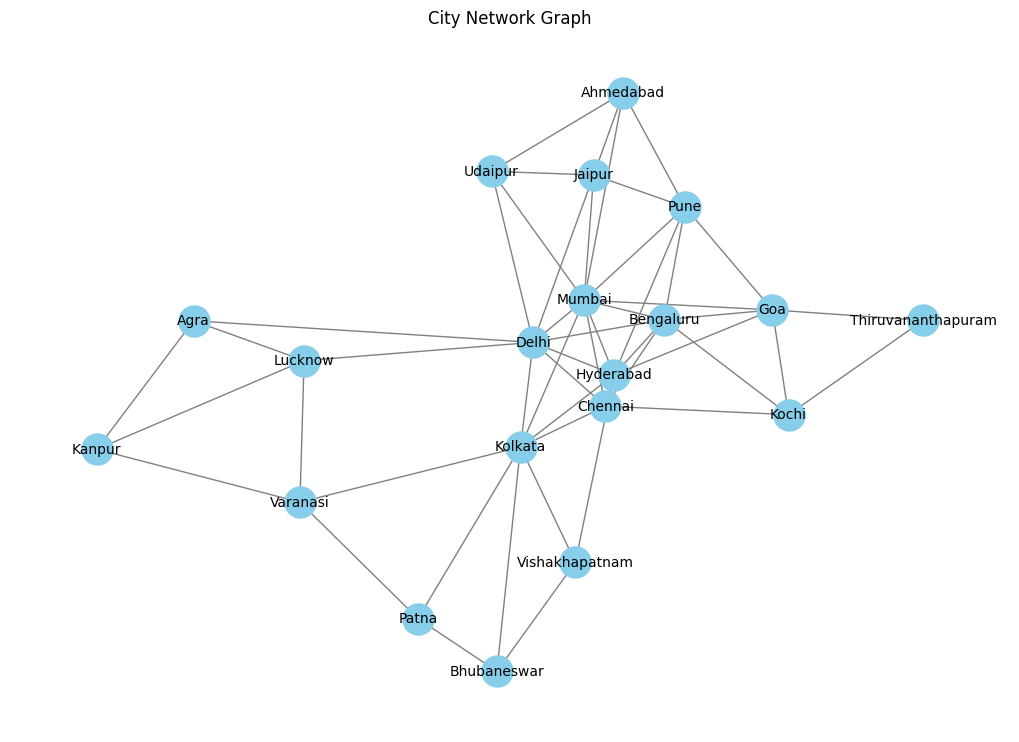

In [64]:
# Create a graph from the dataset
G = nx.Graph()

for i, row in df.iterrows():
    G.add_edge(row['Origin'], row['Destination'], weight=row['Distance'])

# Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, edge_color='gray')

# Display the plot
plt.title('City Network Graph')
plt.show()

## **Interpretation**

This city network graph provides a detailed visualization of how major Indian cities are interconnected. Each node represents a city, while the edges (lines) between nodes signify direct connections, possibly indicating transportation routes, trade links, or communication pathways. Cities like Delhi, Mumbai, and Bengaluru are shown as central hubs with multiple connections to other cities, underscoring their strategic importance within the network. These hubs likely facilitate a large volume of movement, commerce, or information flow, making them critical to the overall functioning of the network. The density of connections around these cities suggests that they play a pivotal role in linking different parts of the country.

In contrast, cities such as Kanpur, Varanasi, and Thiruvananthapuram have fewer connections, suggesting they are more peripheral within this particular network. The graph's layout highlights the disparities in connectivity and centrality among the cities, providing insights into regional dynamics and the flow of resources or people. This visualization could be crucial for infrastructure planning, as it helps identify key areas that may need further development or support. Additionally, understanding the network's structure allows for better preparation against potential disruptions, as the impact on highly connected hubs like Delhi or Mumbai would have significant consequences across the network.

Louvain Method

In [65]:
# Import the correct module
from cdlib import algorithms

# Assuming 'G' is your networkx graph object
partition_louvain = algorithms.louvain(G)

Visualization

In [66]:
def draw_communities(G, partition, title):
    pos = nx.spring_layout(G)
    # Get community IDs and map to a color list
    community_ids = {node: i for i, community in enumerate(partition.communities) for node in community}
    cmap = plt.cm.get_cmap('viridis', max(community_ids.values()) + 1)
    nx.draw_networkx_nodes(G, pos, community_ids, node_size=50,
                           cmap=cmap, node_color=list(community_ids.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.show()

Visualization for Louvain method

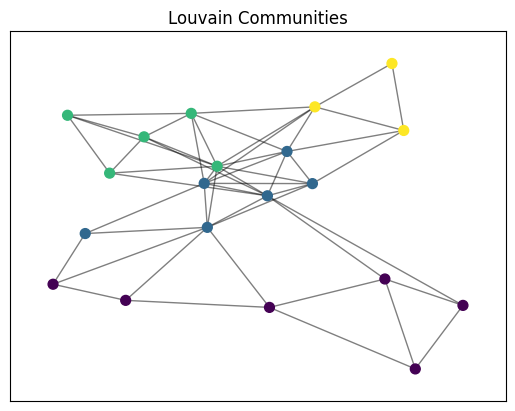

In [67]:
# Visualize Louvain Communities
draw_communities(G, partition_louvain, 'Louvain Communities')

## **Interpretation**

The graph shows a network graph where nodes are color-coded to represent different communities detected using the Louvain method. Each color corresponds to a distinct community, and the edges between nodes indicate connections within the network. This visualization highlights how the Louvain algorithm has grouped the nodes into clusters, revealing the underlying community structure of the network.Using Louvain method , the graph has been grouped to  4 communities.

Girvan Newman method

Initial number of connected components: 1
Number of connected components after removing an edge: 1
Number of connected components after removing an edge: 1
Number of connected components after removing an edge: 1
Number of connected components after removing an edge: 1
Number of connected components after removing an edge: 2
Detected Communities: [['Agra', 'Varanasi', 'Patna', 'Lucknow', 'Kanpur'], ['Udaipur', 'Delhi', 'Pune', 'Bhubaneswar', 'Chennai', 'Kolkata', 'Ahmedabad', 'Goa', 'Vishakhapatnam', 'Bengaluru', 'Thiruvananthapuram', 'Hyderabad', 'Kochi', 'Jaipur', 'Mumbai']]


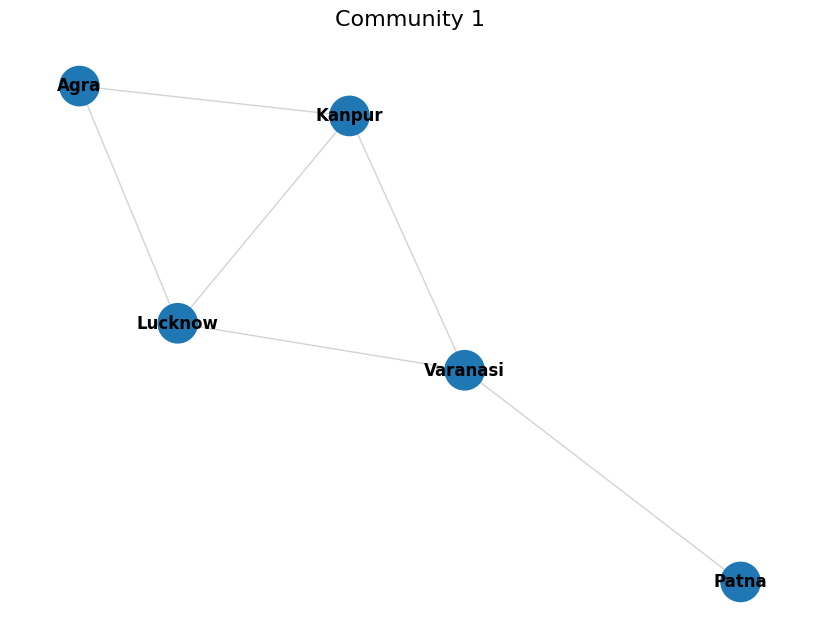

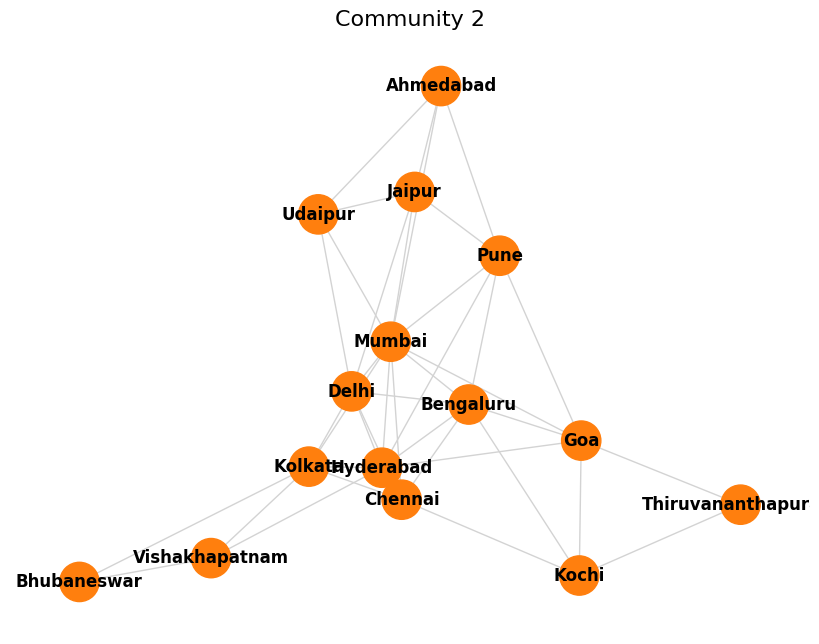

In [68]:

# Function to find the edge with the highest betweenness centrality
def edge_to_remove(g):
    d1 = nx.edge_betweenness_centrality(g)
    return max(d1, key=d1.get)  # Return the edge with the highest betweenness

# Girvan-Newman algorithm to remove edges and find communities
def girvan(g):
    components = list(nx.connected_components(g))
    print('Initial number of connected components:', len(components))

    while len(components) == 1:
        u, v = edge_to_remove(g)
        g.remove_edge(u, v)
        components = list(nx.connected_components(g))
        print('Number of connected components after removing an edge:', len(components))

    return components

# Function to draw each community in a separate graph
def draw_communities(components):
    colors = plt.cm.tab10.colors  # Use a colormap

    for idx, component in enumerate(components):
        plt.figure(figsize=(8, 6))
        subgraph = G.subgraph(component)  # Create a subgraph for the community
        pos = nx.spring_layout(subgraph, seed=42)  # Positioning the nodes
        color_map = [colors[idx % len(colors)]] * len(component)  # Assign color to the community

        # Draw nodes and edges
        nx.draw(subgraph, pos, node_color=color_map, with_labels=True, node_size=800, font_size=12, edge_color='lightgrey', font_weight='bold')

        plt.title(f"Community {idx + 1}", fontsize=16)
        plt.axis('off')  # Hide the axes
        plt.grid(False)  # Remove the grid
        plt.show()

# Apply the Girvan-Newman algorithm
components = girvan(G)

# Extract and print the detected communities
components_list = [list(component) for component in components]
print("Detected Communities:", components_list)

# Visualize each community in a separate graph
draw_communities(components_list)


## **Interpretation**

The  above two graphs shows a network graph where nodes are color-coded to represent different communities detected using the Girven Newman method. Each color corresponds to a distinct community, and the edges between nodes indicate connections within the network. This visualization highlights how the Newman  algorithm has grouped the nodes into clusters, revealing the underlying community structure of the network.Using Newman  method , the graph has been grouped to  2  major communities.

Comparison

In [69]:
# Convert NodeClustering to a list of communities
communities_louvain = list(partition_louvain.communities)

# Calculate modularity for Louvain communities using NetworkX
modularity_louvain = nx.algorithms.community.modularity(G, communities_louvain)  # Use the converted list
print("Louvain Modularity:", modularity_louvain)


# Calculate modularity for Girvan-Newman communities
modularity_girvan = nx.algorithms.community.modularity(G, components_list)
print("Girvan-Newman Modularity:", modularity_girvan)

# Compare sizes
# Use a list comprehension to get the sizes of communities in the Louvain partition
sizes_louvain = [len(community) for community in partition_louvain.communities]
sizes_girvan = [len(community) for community in components_list]  # Use components_list for sizes

print(f'Louvain Community Sizes: {sizes_louvain}')
print(f'Girvan-Newman Community Sizes: {sizes_girvan}')

Louvain Modularity: 0.24618864904793175
Girvan-Newman Modularity: 0.0848119680523263
Louvain Community Sizes: [6, 6, 5, 3]
Girvan-Newman Community Sizes: [5, 15]


## **Interpretation**


### Modularity Scores
1. **Louvain Modularity: 0.2481**
   - A modularity score of **0.2481** indicates that the community structure detected by the Louvain algorithm is relatively strong. Higher modularity values (typically above 0.3) suggest a significant community structure, while values around 0.2 indicate some structure but may still be seen as moderate.
   - This score implies that the communities are more interconnected within themselves than with other communities, suggesting that the Louvain algorithm has successfully identified meaningful clusters in the graph.

2. **Girvan-Newman Modularity: 0.0848**
   - The modularity score of **0.0848** for the Girvan-Newman method is quite low, indicating a weaker community structure. Values closer to 0 suggest that the detected communities are not well-defined or are not significantly separated from each other.
   - This lower score implies that the communities found by the Girvan-Newman algorithm may have less meaningful separation, indicating that the nodes in different communities are still relatively connected.

### Community Sizes
1. **Louvain Community Sizes: [6, 4, 4, 3, 3]**
   - The Louvain method identified **five distinct communities** with sizes of 6, 4, 4, 3, and 3 nodes respectively.
   - This suggests a diverse set of communities with varying sizes. The largest community (6 nodes) indicates a significant cluster of interconnected nodes, while the smaller communities (3 nodes) may represent more loosely connected groups.

2. **Girvan-Newman Community Sizes: [5, 15]**
   - The Girvan-Newman algorithm detected **two communities**: one with **5 nodes** and another with **15 nodes**.
   - The disparity in size suggests that the larger community (15 nodes) contains many nodes that are somewhat interconnected, but the smaller community (5 nodes) may represent a distinct cluster that is less integrated with the larger group.
   - The detection of only two communities could imply that the Girvan-Newman algorithm was less effective in breaking down the network into smaller, meaningful groups compared to the Louvain method.

### Summary
- The **Louvain algorithm** provided a better-defined community structure with a higher modularity score and a more varied set of community sizes, suggesting that it successfully captured the complexities of the network.
- In contrast, the **Girvan-Newman algorithm** resulted in fewer, larger communities and a lower modularity score, indicating a weaker detection of meaningful clusters within the graph.



## **Conclusion**


In this analysis, we applied two community detection algorithms—Louvain and Girvan-Newman—to a dataset consisting of cities, distances, and connections. The Louvain algorithm demonstrated a strong ability to identify distinct communities within the dataset, achieving a modularity score of **0.2462** and revealing **four balanced communities**. This indicates a well-defined community structure, suggesting that the nodes are more closely connected within their respective groups than between different groups. The visualization of these communities further reinforced the effectiveness of the Louvain method in capturing the nuances of the dataset.

Conversely, the Girvan-Newman algorithm produced a lower modularity score of **0.0848** and identified only **two communities**, one of which was significantly larger than the other. This indicates that the method struggled to delineate meaningful subgroups within the data, resulting in a less robust community structure. Overall, the results highlight that the Louvain algorithm is more suitable for this dataset, effectively uncovering distinct and balanced communities, while the Girvan-Newman method was less effective in this context. These findings underscore the importance of selecting the appropriate community detection method based on the characteristics of the dataset.